In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
! ls '/gdrive/MyDrive/Data-Mining/airbnb-ny'

AB_NYC_2019.csv  New_York_City_.png


In [3]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#Uploading data...
root = '/gdrive/MyDrive/Data-Mining/airbnb-ny/'
ab_ny= pd.read_csv(root + "AB_NYC_2019.csv")

## Preview data

In [5]:
ab_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
ab_ny.shape

(48895, 16)

In [7]:
# An overview of numerical data
ab_ny.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
ab_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
ab_ny.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Data cleaning

In [10]:
#Checking for missing values
ab_ny.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

name, host_name, last_review, review_per_month are the columns with missing values.

In [11]:
#Dropping unnecessary columns
ab_ny.drop(['id','name','host_name','last_review'],axis=1, inplace= True)

In [12]:
#Replacing NaN values in 'reviews per month' with the mean
ab_ny.fillna({'reviews_per_month':ab_ny['reviews_per_month'].mean()}, inplace= True)
#Checking for changes
ab_ny.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
#Delete columns with inappropriate values (proeprties with zero price).
ab_ny[ab_ny['price'] == 0.0].shape[0]

11

In [14]:
ab_ny = ab_ny.drop(ab_ny[ab_ny['price']== 0.0].index)
ab_ny.shape

(48884, 12)

Checking for duplication

In [15]:
ab_ny.duplicated().sum()

0

Outlier treatment

In [16]:
from re import I
for cols in ab_ny.columns:
    if ab_ny[cols].dtype == 'int64' or ab_ny[cols].dtype == 'float64':
        upper_range = ab_ny[cols].mean() + 3 * ab_ny[cols].std()
        lower_range = ab_ny[cols].mean() - 3 * ab_ny[cols].std()
        
        indexs = ab_ny[(ab_ny[cols] > upper_range) | (ab_ny[cols] < lower_range)].index
        immo = ab_ny.drop(indexs)

In [17]:
ab_ny.shape

(48884, 12)

Cleaned data:

In [18]:
ab_ny.sample(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19496,100202479,Brooklyn,Bedford-Stuyvesant,40.68642,-73.92864,Entire home/apt,100,3,86,3.02,1,25
17807,29224381,Bronx,Norwood,40.86853,-73.88301,Entire home/apt,120,10,7,0.20,1,327
20262,17167740,Brooklyn,South Slope,40.66593,-73.98790,Private room,93,2,34,1.11,1,34
40012,163603458,Queens,Queens Village,40.72218,-73.73396,Entire home/apt,79,1,59,9.03,2,36
34439,205777414,Manhattan,West Village,40.73858,-74.00619,Entire home/apt,199,4,1,0.10,1,232
35949,92523072,Queens,Rockaway Beach,40.58862,-73.81276,Entire home/apt,150,2,14,7.24,1,97
24736,61689461,Manhattan,Financial District,40.70498,-74.01063,Private room,55,3,2,0.08,1,0
10345,41747327,Manhattan,Lower East Side,40.71909,-73.99028,Entire home/apt,95,1,98,2.13,1,240
23318,131530792,Brooklyn,Sheepshead Bay,40.59019,-73.96123,Entire home/apt,105,2,22,0.87,1,0
36956,213781715,Manhattan,NoHo,40.72872,-73.99199,Entire home/apt,179,1,1,0.68,33,187


## Data visualization


1.   Price distribution
2.   Distribution of availability_365
2.   Number of AirBnb in different neighborhood groups
3.   Price distribution across location
2.   Number of AirBnb in different room types
4.   Price distribution across room types



1.   Price distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


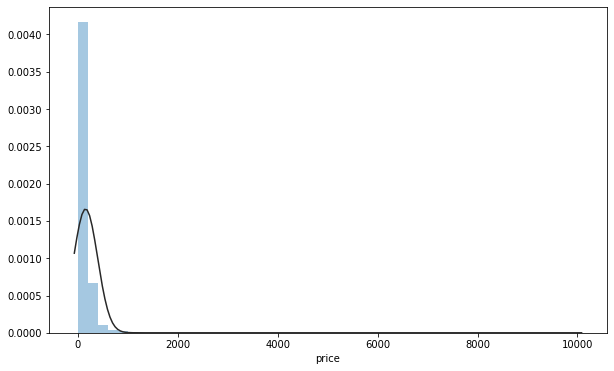

In [19]:
#Price range distribution plot
from scipy.stats import norm
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(a=ab_ny.price,kde= False, fit=norm)
#ax.set_xlim(0, 500)

The plot shows that:
* There is a right-skewed distribution on price
* Price factor has an unstable distribution

In [20]:
#Log transformation
ab_ny['price_log'] = np.log(ab_ny.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

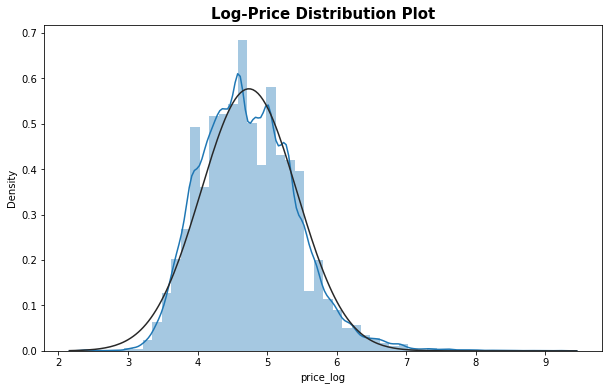

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(ab_ny['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

With log transformation, price feature has normal distribution.



---
2.   Distribution of availability_365



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


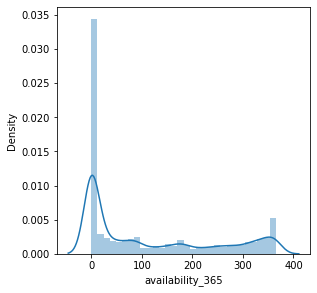

In [22]:
#Availability_365 distribution plot
plt.subplot(224)
sns.distplot(ab_ny['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)

The plot shows that Availability_365 has right skewed distribution



---


3. Number of AirBnb in different neighbourhood groups

In [23]:
# How many neighbourhood groups are there?
ab_ny.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
# How many properties are there in each neighbourhood?
neighbourhood_group_count = pd.DataFrame({'count' : ab_ny.groupby(['neighbourhood_group']).size()}).reset_index()
neighbourhood_group_count

,neighbourhood_group,count
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


<Figure size 864x432 with 0 Axes>

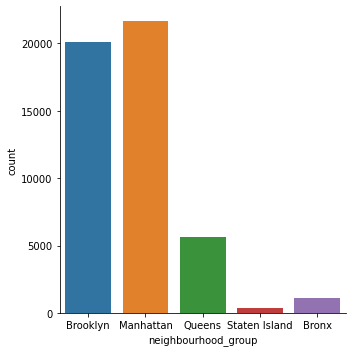

In [25]:
plt.figure(figsize=(12, 6))
sns.catplot(x="neighbourhood_group", kind="count", data=ab_ny)

Histogram shows the number of Airbnbs in diffrent neighborhood groups.

* Manhattan has the most number of Airbnbs.





---


4. Distribution of price across location

In [26]:
neighbourhood_group_price = ab_ny[['neighbourhood_group', 'price']]
neighbourhood_group_price = ab_ny.groupby(['neighbourhood_group'], as_index=False)[['price']].mean()
neighbourhood_group_price

,neighbourhood_group,price
0,Bronx,87.577064
1,Brooklyn,124.438915
2,Manhattan,196.884903
3,Queens,99.517649
4,Staten Island,114.812332


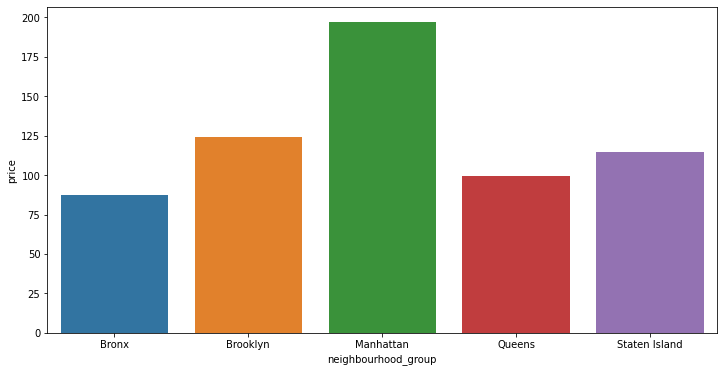

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood_group",y="price", data=neighbourhood_group_price)

Does the number of listing in each borough affect the price? 

Concatenating the two DataFrames, namely neighbourhood_group_count and neighbourhood_group_price will have a better vision about the relation between the price and the number of properties in each neighbourhood group. 

In [28]:
borough_price_count =pd.concat([neighbourhood_group_count, neighbourhood_group_price.reindex(neighbourhood_group_count.index)], axis=1)
borough_price_count = borough_price_count.T.drop_duplicates().T
borough_price_count

,neighbourhood_group,count,price
0,Bronx,1090,87.577064
1,Brooklyn,20095,124.438915
2,Manhattan,21660,196.884903
3,Queens,5666,99.517649
4,Staten Island,373,114.812332


Correlation between the price and the number of properties in each neighbourhood group.

In [29]:
neighbourhood_group_count['count'].corr(neighbourhood_group_price['price'])

0.775843902058638

Conclusion : price and the number of properties in each naighbourhood are almost correlated (0.77), which means boroughs with more number of listing in Airbnb, are more expensive.



---


5. Preferred room type

In [30]:
# How many room types are there?
ab_ny['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [31]:
# wWich room type is the most preferred?
room_type_count= ab_ny.groupby('room_type').size()
room_type_count

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
dtype: int64

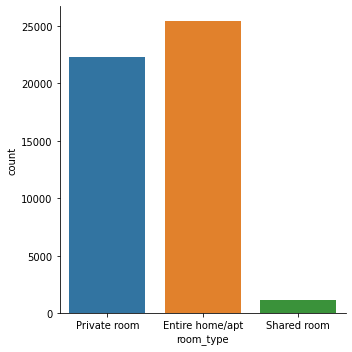

In [32]:
#Histogram
sns.catplot(x="room_type", kind="count", data=ab_ny);


*  "Entire home" and "apartment" are the most preferred room types. Shared room is the least one.




---


6. Price distribution across room types

In [33]:
newdf2= ab_ny[['neighbourhood_group','room_type', 'price']]
newdf2 = newdf2.groupby(['neighbourhood_group','room_type'], as_index=False)[['price']].mean()
newdf2

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


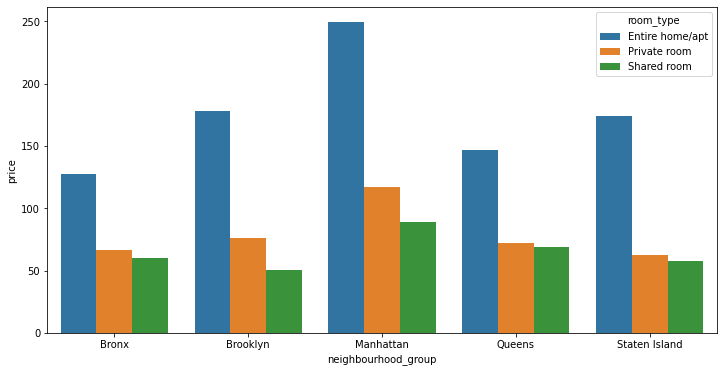

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group',y='price', hue='room_type', data=newdf2)


*  The plot shows that price is not affected by the boroughs, but is affected by the room type. "Entire home" is the most expensive room type (regardless of neighbourhood).

## Hosts analyse


*   Finding hosts with the most listings in NYC.


In [35]:
#Top 10 hosts having the most listing in NYC
top_host=ab_ny.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [36]:
# Checking the correctness of top_host by using an already existing column called 'calculated_host_listings_count'
ab_ny.calculated_host_listings_count.max()

327

In [37]:
# Convert list to data frame
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host_df

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


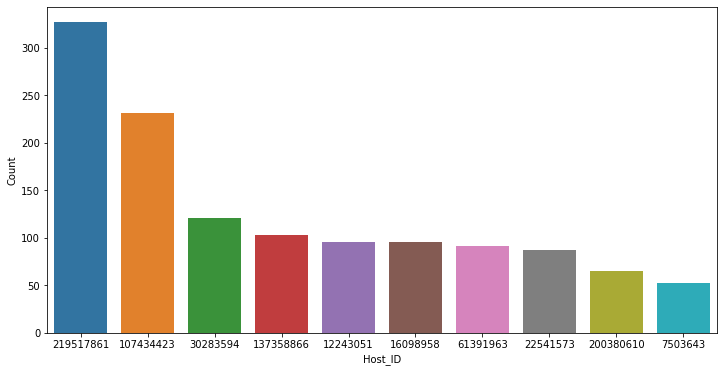

In [38]:
#Histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Host_ID',y='Count', data=top_host_df , order=top_host_df.sort_values('Count',ascending = False).Host_ID)



 The host with maximum number of listings in NewYork has 372 listings.

*  Finding hosts with the most reviews.

In [39]:
# Top 10 hosts having the most reviews
top_host_review= ab_ny[['host_id', 'number_of_reviews']]
top_host_review = ab_ny.groupby(['host_id'])[['number_of_reviews']].sum()
top_host_review.number_of_reviews.sort_values(ascending=False).head(10)


host_id
37312959     2273
344035       2205
26432133     2017
35524316     1971
40176101     1818
4734398      1798
16677326     1355
6885157      1346
219517861    1281
23591164     1269
Name: number_of_reviews, dtype: int64

In [40]:
#Converting list to data frame
top_host_review_df=pd.DataFrame(top_host_review.number_of_reviews.sort_values(ascending=False).head(10))
top_host_review_df.reset_index(inplace=True)
top_host_review_df.rename(columns={'index':'Host_ID'}, inplace=True)
top_host_review_df

,host_id,number_of_reviews
0,37312959,2273
1,344035,2205
2,26432133,2017
3,35524316,1971
4,40176101,1818
5,4734398,1798
6,16677326,1355
7,6885157,1346
8,219517861,1281
9,23591164,1269


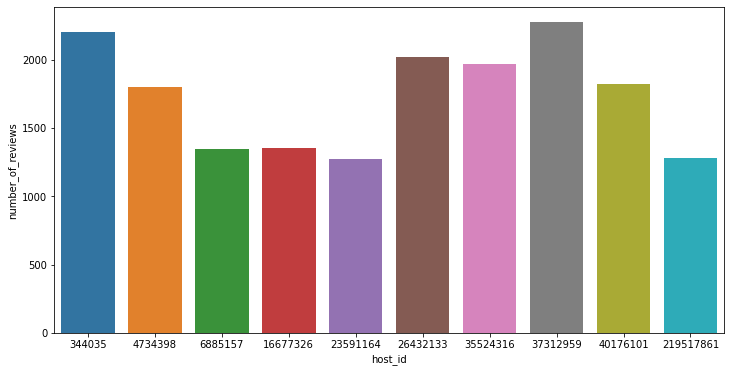

In [41]:
# Histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='host_id',y='number_of_reviews', data=top_host_review_df)

The plot shows top 10 hosts having the most customers (reviews).

*  Which featurs affect the number of reviews?

In [42]:
#Correlation 
newairb= ab_ny.drop(['host_id'],axis=1)

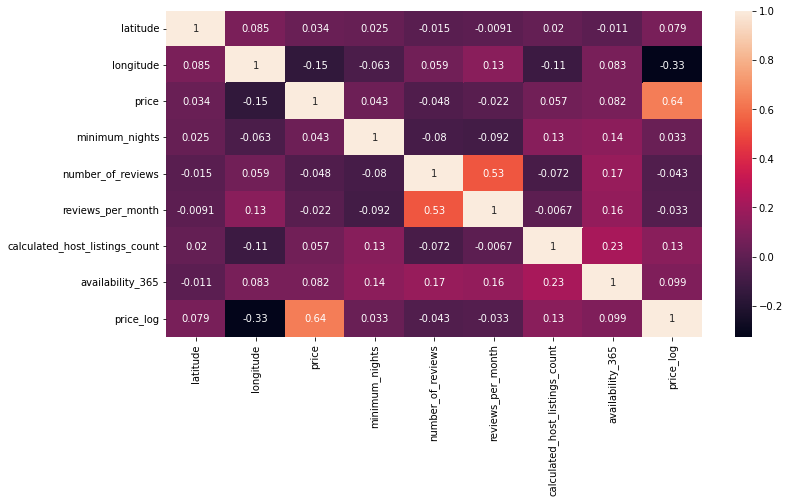

In [43]:
plt.figure(figsize=(12, 6))
corrMatrix = newairb.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

The correlation table shows that our features are not coorelated and there is no strong relationship between the number of reviews and other features.


* Which borough has the most reviews? (Does borough affect the number of reviews?)

In [44]:
top_borough_review= ab_ny[['neighbourhood_group','number_of_reviews']]
top_borough_review = ab_ny.groupby(['neighbourhood_group'])[['number_of_reviews']].sum()
top_borough_review.number_of_reviews.sort_values(ascending=False).head()


neighbourhood_group
Brooklyn         486252
Manhattan        454569
Queens           156950
Bronx             28316
Staten Island     11541
Name: number_of_reviews, dtype: int64

In [45]:
# Converting list to data frame
top_borough_review_df = pd.DataFrame(top_borough_review)
top_borough_review_df.reset_index(inplace=True)
top_borough_review_df.rename(columns={'index':'borough', 'host_id':'number_of_review'}, inplace=True)
top_borough_review_df



,neighbourhood_group,number_of_reviews
0,Bronx,28316
1,Brooklyn,486252
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


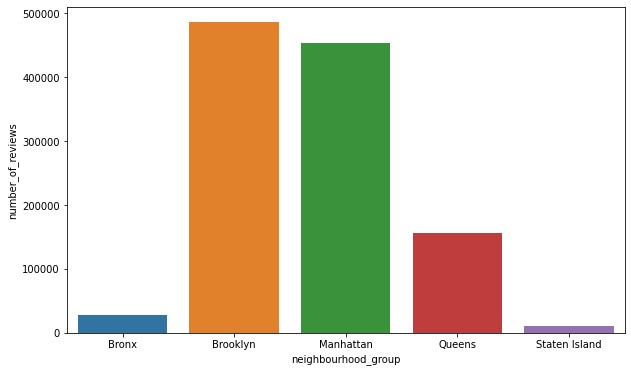

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group',y='number_of_reviews', data=top_borough_review_df)

The plot shows that Brooklyn and Manhattan have the most number of reviews.

 Thus, borough **affects** the number of reviews.


##Hypothesis Test

####Shapiro Test :



**Test 1**
* H0 (Null Hypothesis) : Price distribution is normal

* H1 (Alternate Hypothesis): Price distribution is not normal

In [47]:
import scipy.stats as st
st.shapiro(ab_ny.price)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.30034202337265015, 0.0)

 The p value is 0.0 and thus less than alpha (5%). This implies that the null hypothesis should be rejected and the distribution is not normal.

 Conclusion: Price distribution is not normal. (Price distribution plot has been shown in "Data visualization")


---

####Levene Test 


**Test 2**

H0 (null hypothesis): variance(private_room) = variance(shared_room) = variance(entire_home)

H1 (alternate hypothesis): variance(private_room) != variance(shared_room) != variance(entire_home)


In [48]:
pv = ab_ny[ab_ny['room_type'] == 'Private room']
share = ab_ny[ab_ny['room_type'] == 'Shared room']
apt = ab_ny[ab_ny['room_type'] == 'Entire home/apt']
st.levene(pv.price, share.price, apt.price)

LeveneResult(statistic=404.81916838266966, pvalue=4.2599555983973533e-175)

Conclusion: The p value is approximatly 0.0 and thus less than alpha (5%). This implies that the null hypothesis should be rejected.

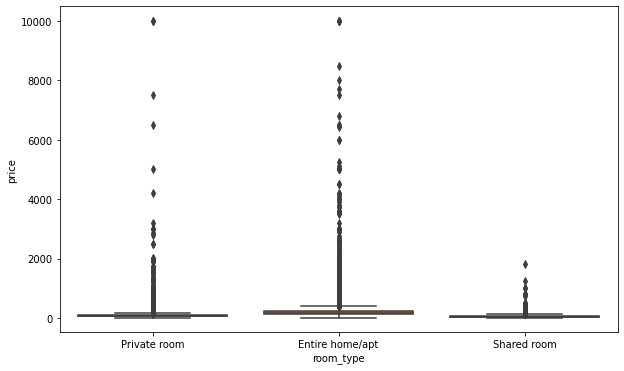

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=ab_ny)





---
**Test 3**

* H0 (null hypothesis): variance(Brooklyn) = variance(Manhattan) = ..... = variance(Bronx)
* H1 (alternate hypothesis): variance(Brooklyn) != variance(Manhattan) != ..... != variance(Bronx)

In [50]:
borough1 = ab_ny[ab_ny['neighbourhood_group'] == 'Brooklyn']['price']
borough2 = ab_ny[ab_ny['neighbourhood_group'] == 'Manhattan']['price']
borough3 = ab_ny[ab_ny['neighbourhood_group'] == 'Queens']['price']
borough4 = ab_ny[ab_ny['neighbourhood_group'] == 'Staten Island']['price']
borough5 = ab_ny[ab_ny['neighbourhood_group'] == 'Bronx']['price']
st.levene(borough1,borough2,borough3,borough4,borough5)

LeveneResult(statistic=120.45120282270643, pvalue=1.858173022081869e-102)

Text(0.5, 1.0, 'Distribution of prices acros location')

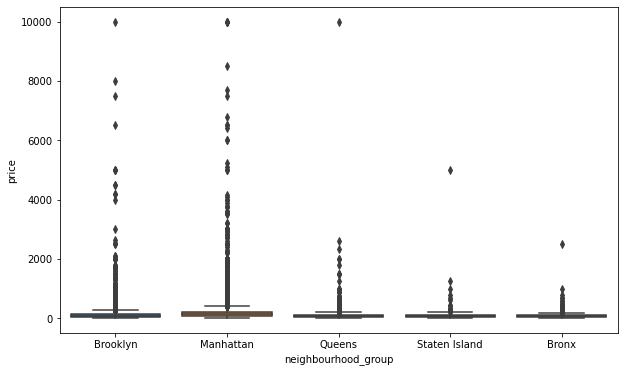

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='neighbourhood_group',data=ab_ny)
ax.set_title(label = 'Distribution of prices acros location', fontsize = 30)

Conclusion: The p value is approximatly 0.0 and thus less than alpha (5%). This implies that the null hypothesis should be rejected.


---
####Kruskal Wallis Test



**Test 4**

* H0 (null hypothesis): mean_price(private_room) = mean_price(shared_room) = mean_price(entire_home/apt)

* H1 (alternate hypothesis): mean_price(private_room) != mean_price(shared_room) != mean_price(entire_home/apt)


In [52]:
st.kruskal(pv.price,share.price,apt.price)

KruskalResult(statistic=22414.838451732678, pvalue=0.0)

Conclusion: The p value is approximatly 0.0 and thus less than alpha (5%). This implies that the null hypothesis should be rejected.

In [53]:
ind = ['Private Rooms','Apartments','Shared Rooms']
x = pd.DataFrame([pv.price.mean(),apt.price.mean(),share.price.mean()], index=ind)
x

,0
Private Rooms,89.809131
Apartments,211.810918
Shared Rooms,70.248705


<Figure size 720x432 with 0 Axes>

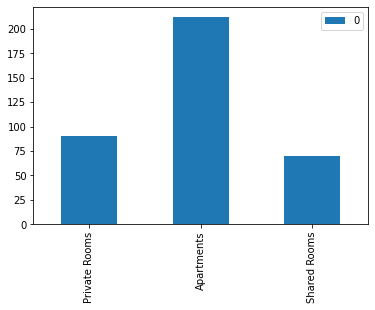

In [54]:
plt.figure(figsize=(10,6))
x.plot.bar()
plt.show()



---

**Test 5**

* H0 (null hypothesis): mean_price(Brooklyn) = mean_price(Manhattan) = ..... = mean_price(Bronx)

* H1 (null hypothesis): mean_price(Brooklyn) != mean_price(Manhattan) != ..... != mean_price(Bronx)

In [55]:
borough1 = ab_ny[ab_ny['neighbourhood_group'] == 'Brooklyn']['price']
borough2 = ab_ny[ab_ny['neighbourhood_group'] == 'Manhattan']['price']
borough3 = ab_ny[ab_ny['neighbourhood_group'] == 'Queens']['price']
borough4 = ab_ny[ab_ny['neighbourhood_group'] == 'Staten Island']['price']
borough5 = ab_ny[ab_ny['neighbourhood_group'] == 'Bronx']['price']
st.kruskal(borough1,borough2,borough3,borough4,borough5)

KruskalResult(statistic=7023.124698515672, pvalue=0.0)

Conclusion: The p value is 0.0 and thus less than alpha (5%). This implies that the null hypothesis should be rejected.

---


####Chi Squared Test




**Test 6**

* H0 (null hypothesis): There is no association between Room Type and Neighbourhood Group.
*H1 (alternate hypothesis): There is an association between Room Type and Neighbourhood Group.

In [56]:
tab = pd.crosstab(ab_ny['room_type'],ab_ny['neighbourhood_group'])

In [57]:
st.chi2_contingency(tab)

(1558.4325467152619,
 0.0,
 8,
 array([[5.66517265e+02, 1.04441876e+04, 1.12575816e+04, 2.94485030e+03,
         1.93863248e+02],
        [4.97662016e+02, 9.17478735e+03, 9.88932043e+03, 2.58692934e+03,
         1.70300855e+02],
        [2.58207184e+01, 4.76025080e+02, 5.13097946e+02, 1.34220358e+02,
         8.83589723e+00]]))

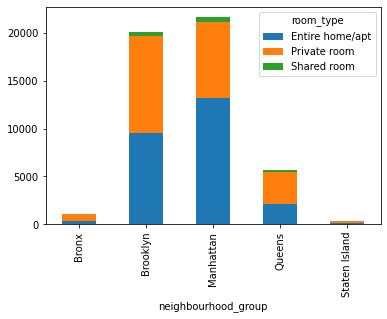

In [58]:
y = pd.crosstab(ab_ny['neighbourhood_group'],ab_ny['room_type'])
y.plot.bar(stacked=True)
plt.show()

The p value is 0.0 and less than alpha (0.05) and This implies that the null hypothesis should be rejected.

## Model building

In [59]:
# Import usefull libraries
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [60]:
# Dropping some variables that do not help 
dfModel = ab_ny.drop(["latitude","longitude", "host_id", "neighbourhood"],axis=1)
dfModel.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Brooklyn,Private room,149,1,9,0.210000,6,365,5.010635
1,Manhattan,Entire home/apt,225,1,45,0.380000,2,355,5.420535
2,Manhattan,Private room,150,3,0,1.373221,1,365,5.017280
3,Brooklyn,Entire home/apt,89,1,270,4.640000,1,194,4.499810
4,Manhattan,Entire home/apt,80,10,9,0.100000,1,0,4.394449


In [61]:
# Convert categorical data to dummies variables
dfmodel_new = pd.get_dummies(dfModel, columns=['neighbourhood_group',"room_type"])
dfmodel_new.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.210000,6,365,5.010635,0,1,0,0,0,0,1,0
1,225,1,45,0.380000,2,355,5.420535,0,0,1,0,0,1,0,0
2,150,3,0,1.373221,1,365,5.017280,0,0,1,0,0,0,1,0
3,89,1,270,4.640000,1,194,4.499810,0,1,0,0,0,1,0,0
4,80,10,9,0.100000,1,0,4.394449,0,0,1,0,0,1,0,0


In [62]:
# Split dataset into test and training data
y = dfmodel_new['price']
x = dfmodel_new.drop(columns = ['price'])
print(x.shape)
print(y.shape)

(48884, 14)
(48884,)


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

Feature scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Linear Regression Model

In [65]:
# Fitting Linear regression
reg = LinearRegression().fit(x_train, y_train)

In [66]:
# R2 value
print("R2 score: ",reg.score(x_train, y_train))

R2 score:  0.4526356329681537


In [72]:
# Predicting
y_pred = reg.predict(x_test)
print("y_pred: ", reg.predict(x_test))

y_pred:  [ 94.08078281  82.28842103 124.02908637 ...  84.98392587  93.27602322
   7.25452825]


In [73]:
# Calculating RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ",rmse)

RMSE:  182.75319767029436


In [74]:
#Error
errordf = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(errordf.head(5))

   Actual Values  Predicted Values
0            105         94.080783
1             68         82.288421
2             75        124.029086
3            130        149.291654
4             95        134.349660


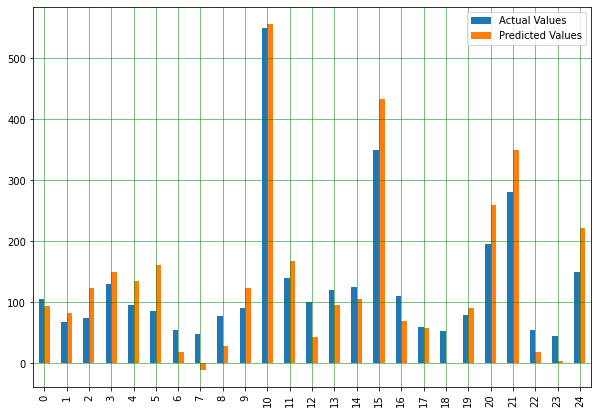

In [75]:
# Error visualization
df1 = errordf.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Tree Regression

In [76]:
#Preparing a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_pred=DTree.predict(x_test)


In [77]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score:  99.86906540185383
RMSE:  8.910702258318334


In [78]:
#Error
errordf2 = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(errordf2.head(5))

   Actual Values  Predicted Values
0            105             106.0
1             68              69.0
2             75              76.0
3            130             131.0
4             95              96.0


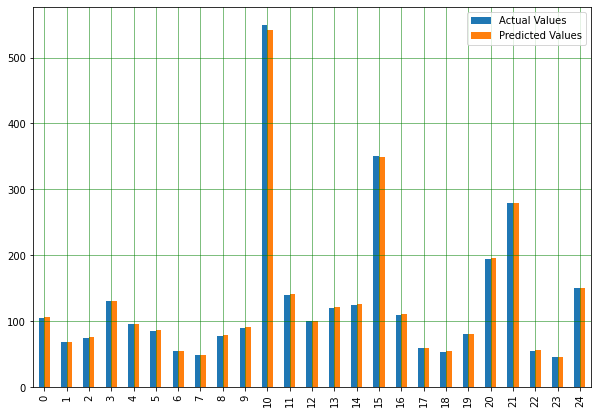

In [79]:
#Error visualization
df2 = errordf2.head(25)
df2.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

####Lasso regression

In [80]:
regL1 = Lasso(alpha=0.01)
regL1.fit(x_train, y_train) 

y_pred=regL1.predict(x_test)

In [81]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score:  44.92807149831059
RMSE:  182.74683536709176


In [82]:
#Error
errordf3 = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(errordf3.head(5))


   Actual Values  Predicted Values
0            105         94.179935
1             68         82.413071
2             75        124.079193
3            130        149.377894
4             95        134.383399


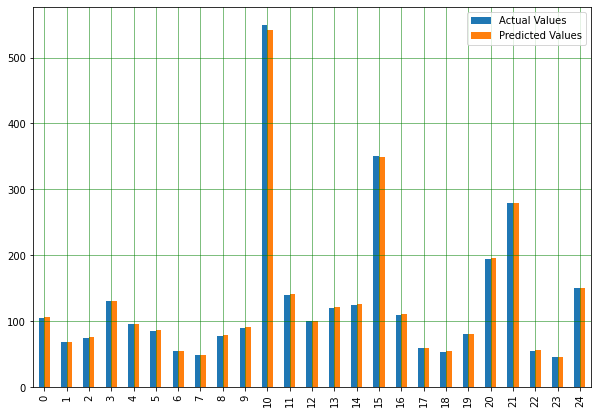

In [83]:
#Error visualization
df2 = errordf2.head(25)
df2.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##Bonus task:
Does the number of museums in each borough affect the price?

The data I've been using is from Wikipedia ["List of museums in New York City"](https://en.wikipedia.org/wiki/List_of_museums_in_New_York_City) that has been converted to a csv file.




In [84]:
! ls '/gdrive/MyDrive/Data-Mining/nyc_museums'

table-1.csv


In [85]:
#Uploading data...
root = '/gdrive/MyDrive/Data-Mining/nyc_museums/'
mus= pd.read_csv(root + "table-1.csv")

In [86]:
#Overview
mus.head()

,Name,Neighborhood,Borough,Type,Focus,Summary
0,9/11 Tribute Museum,Lower Manhattan,Manhattan,History,American and NY history,History of the September 11 attacks and tours ...
1,African Burial Ground National Monument,Lower Manhattan,Manhattan,History,African and African-American,Visitor center and memorial to an 18th-century...
2,AIGA National Design Center,Lower Manhattan,Manhattan,Art,"Design, decorative arts, architecture","website, public gallery of the AIGA dedicated ..."
3,A.I.R. Gallery,Dumbo,Brooklyn,Art,Contemporary art,Contemporary art by female artists
4,Alice Austen House,Rosebank,Staten Island,Historic house,"Photography, film, new media","Home of photographer Alice Austen, also featur..."


In [87]:
mus.groupby(['Borough']).size()

Borough
Bronx             17
Brooklyn          29
Manhattan        133
Queens            24
Staten Island     14
dtype: int64

In [88]:
#Converting to DataFrame
mus_borough_count = pd.DataFrame({'NumberOfMuseums' : mus.groupby(['Borough']).size()}).reset_index()
mus_borough_count

,Borough,NumberOfMuseums
0,Bronx,17
1,Brooklyn,29
2,Manhattan,133
3,Queens,24
4,Staten Island,14


The list above shows the number of museums in each borough.

Boroughs with the most number of musuems in descending order are Manhathan, Brooklyn, Queens, Bronx, and Staten Island. 

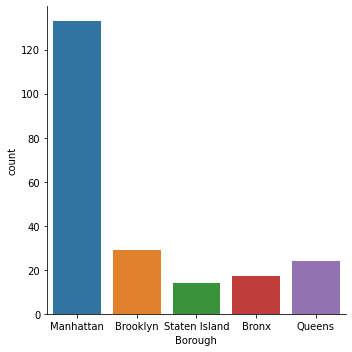

In [89]:
sns.catplot(x="Borough", kind="count", data=mus)

Here I use the data frame that we already have (in the data visualization section), called "neghborhood_group_price". This data frame shows the price distribution across the neighbourhoods. Merging these two data frames will help us to find the correlation between the number of museums and the price in each neighbourhood.

In [90]:
neighbourhood_group_price

,neighbourhood_group,price
0,Bronx,87.577064
1,Brooklyn,124.438915
2,Manhattan,196.884903
3,Queens,99.517649
4,Staten Island,114.812332


In [91]:
mus_price = pd.concat([neighbourhood_group_price, mus_borough_count.reindex(neighbourhood_group_price.index)], axis=1)
mus_price = mus_price.drop(['Borough'], axis=1)
mus_price

,neighbourhood_group,price,NumberOfMuseums
0,Bronx,87.577064,17
1,Brooklyn,124.438915,29
2,Manhattan,196.884903,133
3,Queens,99.517649,24
4,Staten Island,114.812332,14


In [92]:
mus_price.corr()

,price,NumberOfMuseums
price,1.000000,0.953753
NumberOfMuseums,0.953753,1.000000


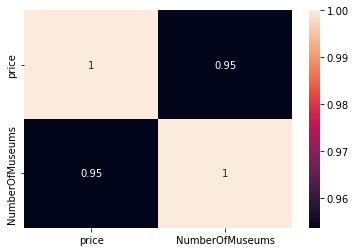

In [93]:
#plt.figure(figsize=(12, 6))
sns.heatmap(mus_price.corr(), annot=True)
plt.show()

The plot shows that the correlation between the two features (price and number of museums) is high. Thus these features are related and the number of museums in each neighbourhood, affect the price of properties.